# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.005989e+01     8.469034e+00
 * time: 0.004683971405029297
     1     2.632992e+01     4.508518e+00
 * time: 0.021940946578979492
     2     1.740879e+01     4.439236e+00
 * time: 0.04252195358276367
     3     1.140791e+01     2.265643e+00
 * time: 0.06297898292541504
     4     1.084697e+01     1.907455e+00
 * time: 0.07937788963317871
     5     9.847409e+00     1.671004e+00
 * time: 0.09577393531799316
     6     9.246387e+00     1.485389e+00
 * time: 0.1121377944946289
     7     8.847803e+00     1.144844e+00
 * time: 0.1289358139038086
     8     8.471093e+00     1.044251e+00
 * time: 0.14599394798278809
     9     8.188270e+00     6.324892e-01
 * time: 0.16308879852294922
    10     8.051557e+00     4.545618e-01
 * time: 0.18016982078552246
    11     7.997350e+00     2.986919e-01
 * time: 0.1972057819366455
    12     7.973201e+00     4.686665e-01
 * time: 0.21007776260375977
    13     7.943142e+00     3.350919e-01
 * time: 

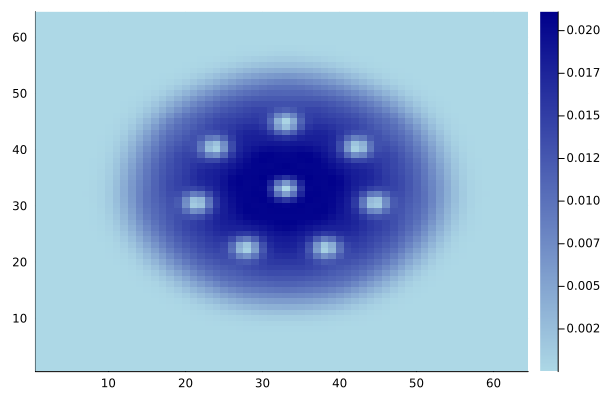

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)